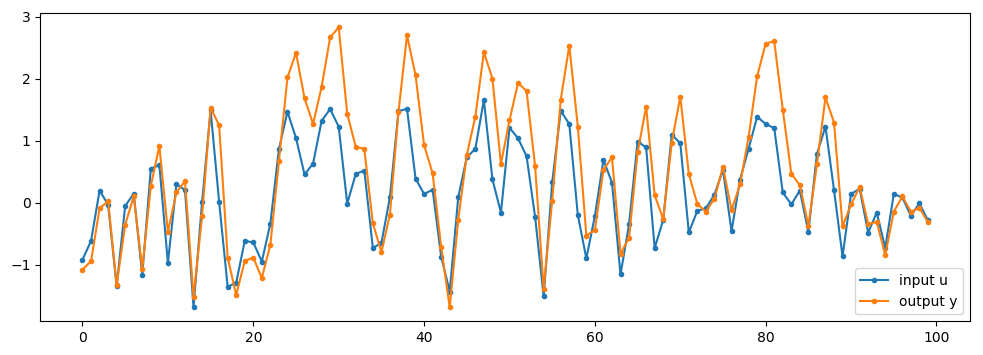

In [1]:
# Read raw data
using CSV
raw = CSV.read("uy_data.csv", datarow = 1);
u = raw[:,1];
y = raw[:,2];
T = length(u)

# plot the u and y data
using PyPlot
figure(figsize=(12,4))
plot([u y],".-");
legend(["input u", "output y"], loc="lower right");

### Moving Average Model (MA)

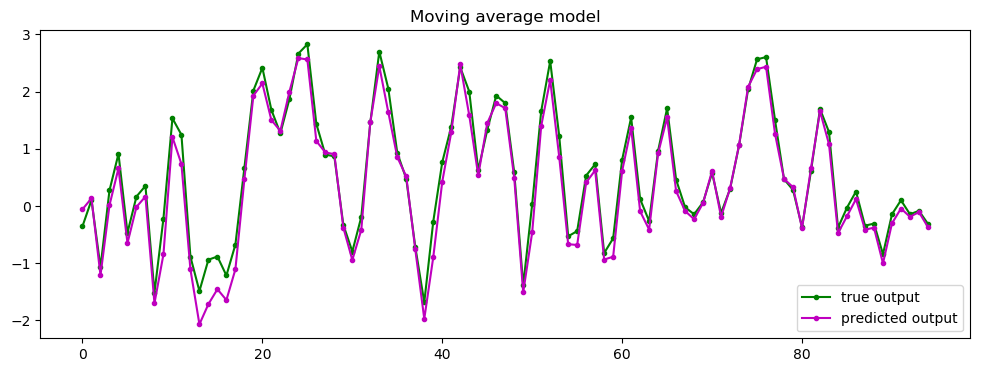


Squared Error: 2.3755098500495313


In [5]:
using LinearAlgebra

# generate A matrix. Using more width creates better fit.  (MA model)
width = 5
y_ma = y[6:100] # Since width = 5, we start from the sixth element
u_ma = u[6:100]
Ay1 = zeros(T-width,width)
for k = 1:width
    Ay1[k:end,k] = u_ma[1:end-k+1] # based on given formula
end

wopt = Ay1\y_ma
yest = Ay1*wopt

figure(figsize=(12,4))
plot(y_ma,"g.-",yest,"m.-")
legend(["true output", "predicted output"], loc="lower right");
title("Moving average model");
println()
println("Squared Error: ",LinearAlgebra.norm(yest-y_ma))

### Autoregressive (AR)

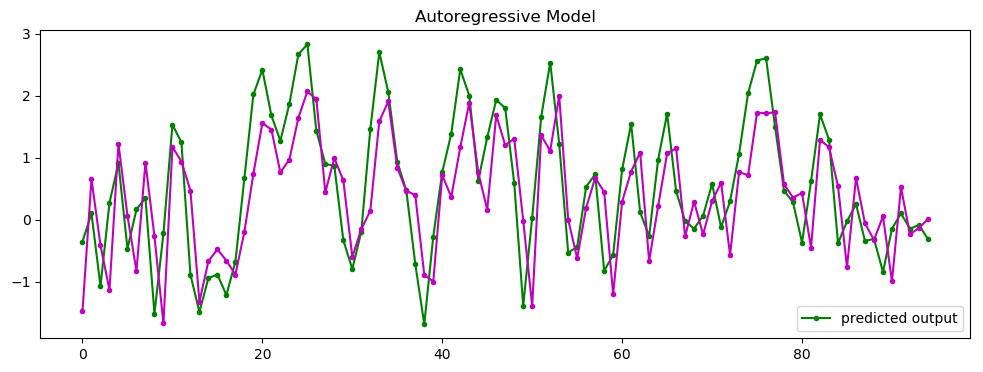


Squared Error: 7.258487354660687


In [6]:
using LinearAlgebra

# generate A matrix. Using more width creates better fit.  (MA model)
width = 5

Ay2 = zeros(T-width, width)
y2_ar = y[6:100]

# regressive function
for i = 1:length(u)-width
    # sum previous values
    for j = 1:width
        Ay2[i,j] = y[i-j+5]
    end
end

wopt = Ay2\y2_ar
yest = Ay2*wopt

figure(figsize=(12,4))
plot(y2_ar,"g.-",yest,"m.-")
legend(["predicted output"], loc="lower right");
title("Autoregressive Model");
println()
println("Squared Error: ",LinearAlgebra.norm(yest-y2_ar))

### Autoregressive Moving Average

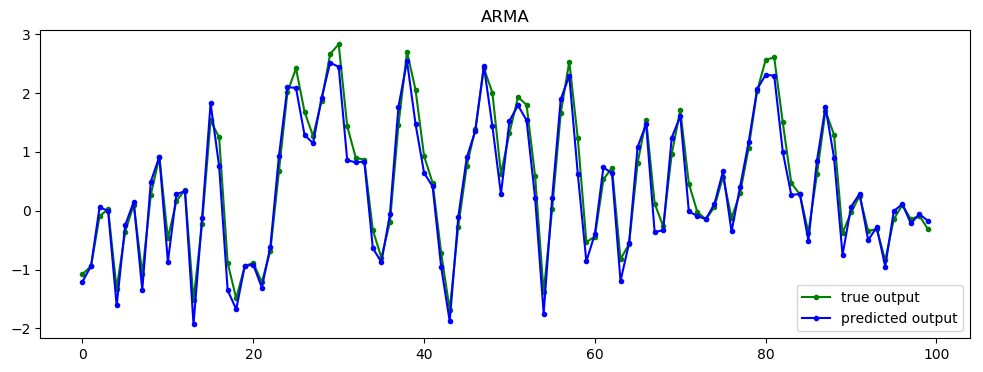


Squared Error: 2.479372243499083


In [7]:
using LinearAlgebra

# generate A matrix. Using more width creates better fit.  (ARMA model)
width = 1
Ay3 = zeros(T,width)

for k = 1:width
    # Get moving average model first
    Ay3[k:end,k] = u[k:end-k+1]
end

for i = 1:T-width
    # Add with autoregressive model 
    for j = 1:width
        Ay3[i,j] = Ay3[i,j] + y[(i-j+1)]
    end
end

wopt = Ay3\y
yest = Ay3*wopt

figure(figsize=(12,4))
plot(y,"g.-",yest,"b.-")
legend(["true output", "predicted output"], loc="lower right");
title("ARMA");
println()
println("Squared Error: ",LinearAlgebra.norm(yest-y))

# Part C

Comparing the squared error of each model, we can get moving average and autoregressive moving average model are better and autoregressive model is worse based on the squared error. Autoregressive model is using previous values to predict the current value so the predicted value is lagged. That's why it has larger error.